In [1]:
import numpy as np
from scipy.stats import bootstrap

# Original data
data = np.array([10, 12, 13, 15, 18, 21, 25, 30, 35, 40])

# Reshape to (1, n) for single sample
res = bootstrap((data,), np.mean, confidence_level=0.95, n_resamples=1000, method='percentile')

print(f"Bootstrap 95% CI for the mean: [{res.confidence_interval.low:.2f}, {res.confidence_interval.high:.2f}]")


Bootstrap 95% CI for the mean: [15.90, 28.50]


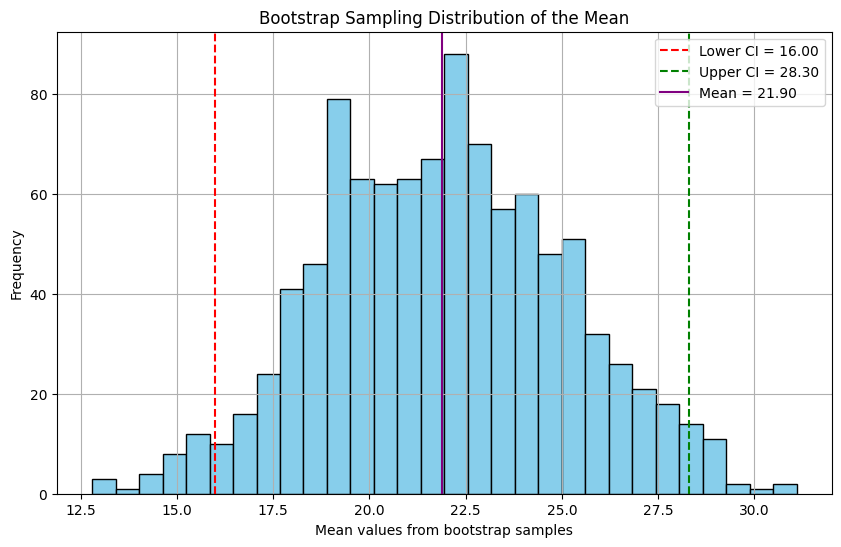

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bootstrap

# Sample data
data = np.array([10, 12, 13, 15, 18, 21, 25, 30, 35, 40])

# Reshape data for bootstrap
data_for_bootstrap = (data,)

# Run bootstrap (95% CI for mean)
res = bootstrap(
    data_for_bootstrap,
    np.mean,
    confidence_level=0.95,
    n_resamples=1000,
    method='percentile',
    random_state=42
)

# CI bounds
ci_low = res.confidence_interval.low
ci_high = res.confidence_interval.high

# Generate bootstrap sample distribution for plotting
boot_means = []
for _ in range(1000):
    sample = np.random.choice(data, size=len(data), replace=True)
    boot_means.append(np.mean(sample))

# Plot
plt.figure(figsize=(10, 6))
plt.hist(boot_means, bins=30, color='skyblue', edgecolor='black')
plt.axvline(ci_low, color='red', linestyle='--', label=f'Lower CI = {ci_low:.2f}')
plt.axvline(ci_high, color='green', linestyle='--', label=f'Upper CI = {ci_high:.2f}')
plt.axvline(np.mean(data), color='purple', linestyle='-', label=f'Mean = {np.mean(data):.2f}')
plt.title('Bootstrap Sampling Distribution of the Mean')
plt.xlabel('Mean values from bootstrap samples')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()
